In [1]:
import os
import openai
from dotenv import load_dotenv
from pandas_market_agent.agent.agent import create_pandas_market_agent
from langchain_openai.chat_models import ChatOpenAI
from langchain.callbacks import StdOutCallbackHandler
import matplotlib.pyplot as plt

load_dotenv()

OPENAI_API_KEY = os.environ.get("OPENAI_API_KEY")
DB_HOST = os.getenv("POSTGRES_HOST", "localhost")
DB_PORT = os.getenv("POSTGRES_PORT", "5432")
DB_NAME = os.environ.get("POSTGRES_DB")
DB_USER = os.environ.get("POSTGRES_USER")
DB_PASSWORD = os.environ.get("POSTGRES_PASSWORD")

2024-02-03 03:53:47,884 - INFO - Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-02-03 03:53:47,885 - INFO - NumExpr defaulting to 8 threads.


In [2]:
%matplotlib inline


In [3]:
openai.api_key = OPENAI_API_KEY


llm = ChatOpenAI(temperature=0, model="gpt-4", streaming=True)

agent_executor = create_pandas_market_agent(
    llm=llm,
    # to load specified stocks instead of internal default list from stocks.json
    # stocks=["CAT", "NKE", "XOM"], 
)

2024-02-03 03:53:54,296 - WARNING - Invalid format for stocks. Expected a list of strings or a list of dictionaries with 'ticker' and 'sector' keys. Will use default stocks from internal stocks.json.
2024-02-03 03:53:54,296 - INFO - No stocks provided, loading default stocks list from stocks.json
/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/python3.10/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/

/home/oleh/arkad/arkad-demo/arkad-pandas-demo/notebooks/.venv/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...


2024-02-03 03:54:14,741 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `date_tool` with `{'query': '5 days ago'}`


I could not parse date

2024-02-03 03:54:15,662 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `date_tool` with `{'query': '5 business days ago'}`


I could not parse date

2024-02-03 03:54:16,789 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"



Invoking: `PandasTool` with `{'query': 'Calculate average performance for Oil and Solar sectors for last 5 days. You must take average performance of every stock in a sector as an average performance of given sector in a given day. Plot comparative chart for both sectors per date. Use date on x axis.'}`




2024-02-03 03:54:19,452 - INFO - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"




> Entering new AgentExecutor chain...


2024-02-03 03:54:20,108 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Thought: To calculate the average performance for the Oil and Solar sectors for the last 5 days, I need to filter the dataframe to only include rows where the 'Sector' column is either 'Oil' or 'Solar', and the 'Date' column is within the last 5 days. Then, I can group by 'Date' and 'Sector' and calculate the mean of the 'DailyChangePercent' column. Finally, I can plot the results. 

Action: python_repl_ast
Action Input: df['Date'] = pd.to_datetime(df['Date'])

2024-02-03 03:54:24,981 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


I forgot to import the pandas library. I need to import it before I can use it to convert the 'Date' column to datetime.
Action: python_repl_ast
Action Input: import pandas as pd
df['Date'] = pd.to_datetime(df['Date'])

2024-02-03 03:54:27,848 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Now that the 'Date' column has been converted to datetime, I can filter the dataframe to only include rows where the 'Sector' column is either 'Oil' or 'Solar', and the 'Date' column is within the last 5 days.
Action: python_repl_ast
Action Input: df_filtered = df[(df['Sector'].isin(['Oil', 'Solar'])) & (df['Date'] > df['Date'].max() - pd.Timedelta(days=5))]

2024-02-03 03:54:33,378 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Now that I have filtered the dataframe, I can group by 'Date' and 'Sector' and calculate the mean of the 'DailyChangePercent' column.
Action: python_repl_ast
Action Input: df_grouped = df_filtered.groupby(['Date', 'Sector'])['DailyChangePercent'].mean().reset_index()

2024-02-03 03:54:36,877 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Now that I have the average daily performance for the Oil and Solar sectors for the last 5 days, I can plot the results. I will use matplotlib library for this.
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
for sector in ['Oil', 'Solar']:
    df_sector = df_grouped[df_grouped['Sector'] == sector]
    plt.plot(df_sector['Date'], df_sector['DailyChangePercent'], label=sector)
plt.xlabel('Date')
plt.ylabel('Average Daily Change Percent')
plt.title('Average Performance for Oil and Solar Sectors for Last 5 Days')
plt.legend()
plt.show()

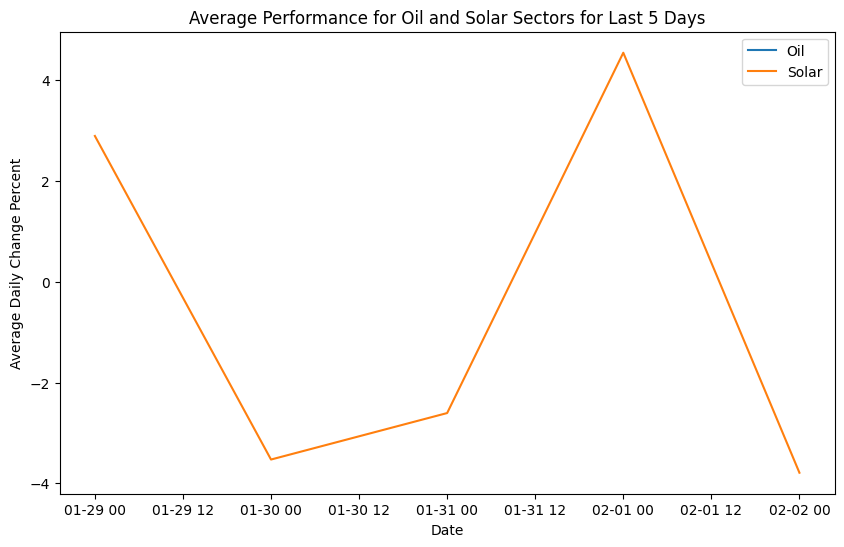

2024-02-03 03:54:42,594 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


I have plotted the average daily performance for the Oil and Solar sectors for the last 5 days. The chart shows the date on the x-axis and the average daily change percent on the y-axis. The two sectors are differentiated by different colors and are labeled in the legend.
Final Answer: The chart shows the average daily performance for the Oil and Solar sectors for the last 5 days. The date is on the x-axis and the average daily change percent is on the y-axis. The two sectors are differentiated by different colors and are labeled in the legend.

> Finished chain.
{'input': 'Calculate average performance for Oil and Solar sectors for last 5 days. You must take average performance of every stock in a sector as an average performance of given sector in a given day. Plot comparative chart for both sectors per date. Use date on x axis.', 'output': 'The chart shows the average daily performance for the Oil and Solar sectors for the last 5 days. The date is on the x-axis and the average daily

2024-02-03 03:54:47,100 - INFO - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


The chart shows the average daily performance for the Oil and Solar sectors for the last 5 days. The date is on the x-axis and the average daily change percent is on the y-axis. The two sectors are differentiated by different colors and are labeled in the legend.

> Finished chain.


In [4]:
response = agent_executor(
            {"input": "Calculate average performance for Oil and Solar sectors for last 5 days. "
             "You must take average performance of " 
             "every stock in a sector as an average performance of given sector in a given day. "
             "Plot comparative chart for both sectors per date. Use date on x axis.", "chat_history": []},
            # callbacks=[StdOutCallbackHandler()],
)